In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca Semua Gambar Yang ada di Folder "Gambar"

Memproses gambar pada folder: COVID2_CT
Memproses gambar pada folder: pneumonia_CT
Memproses gambar pada folder: Normal_CT
Penginputan Seluruh Gambar selesai^^


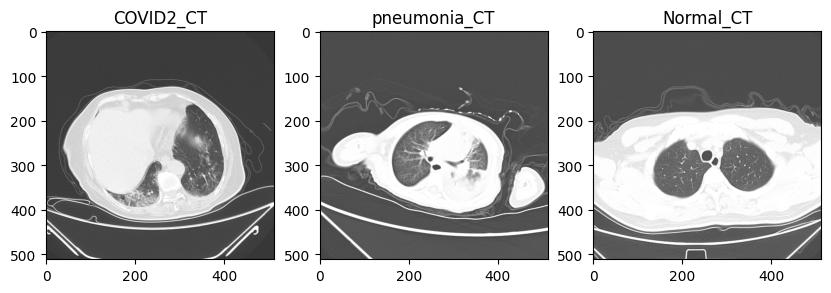

In [4]:
def gambar(folder):
    Baca_gambar = {}
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            print(f"Memproses gambar pada folder: {label}")
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                    break  # Hanya mengambil satu gambar per folder
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                # Menampilkan gambar secara horizontal
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    print('===========================================')
    print("Penginputan Seluruh Gambar selesai^^")
    plt.show()
    return Baca_gambar

# Folder yang berisi gambar
folder_path = r'/Users/magistraaptam/Downloads/Update_Projek PCD_TURU ZZZZZ/Gambar'

# Memanggil fungsi untuk membaca dan memproses gambar dalam folder
Hasil_Gambar = gambar(folder_path)


## Merubah Ukuran dan Memrubah Gambar Menjadi Grayscale

In [5]:
def resize_image(image, new_width, new_height):
    height, width = image.shape[:2]
    scale_x = new_width / width
    scale_y = new_height / height
    resized_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            src_x = int(x / scale_x)
            src_y = int(y / scale_y)
            resized_image[y, x] = image[src_y, src_x]

    return resized_image

In [6]:
# Ukuran yang diinginkan
new_width = 250
new_height = 250

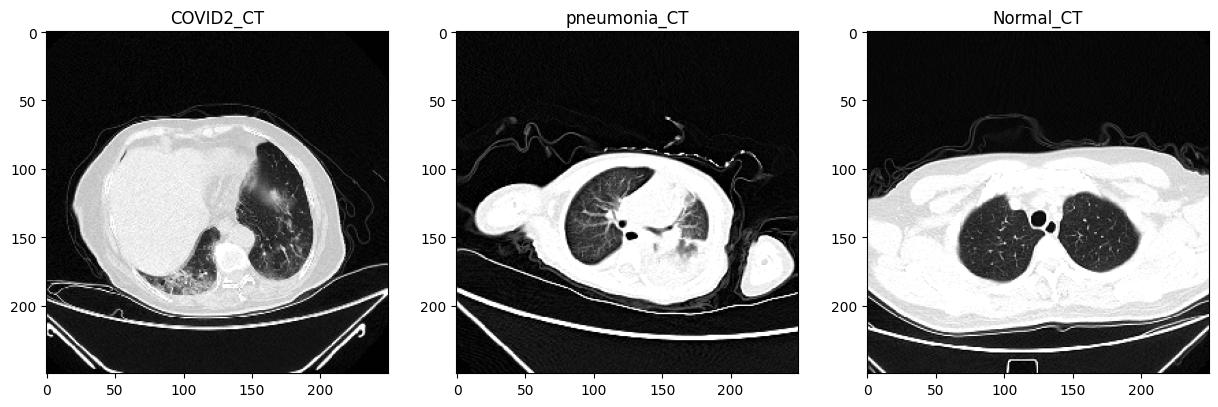

In [7]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            resized_img = resize_image(img, new_width, new_height)
            
            # Menampilkan gambar
            update[i].imshow(resized_img, cmap='gray')
            update[i].set_title(label)

plt.show()


## Melakukan Invers

In [8]:
def invert_image(image):
    inverted_image = 255 - image  # Melakukan inversi dengan mengurangi setiap nilai piksel dari 255
    return inverted_image

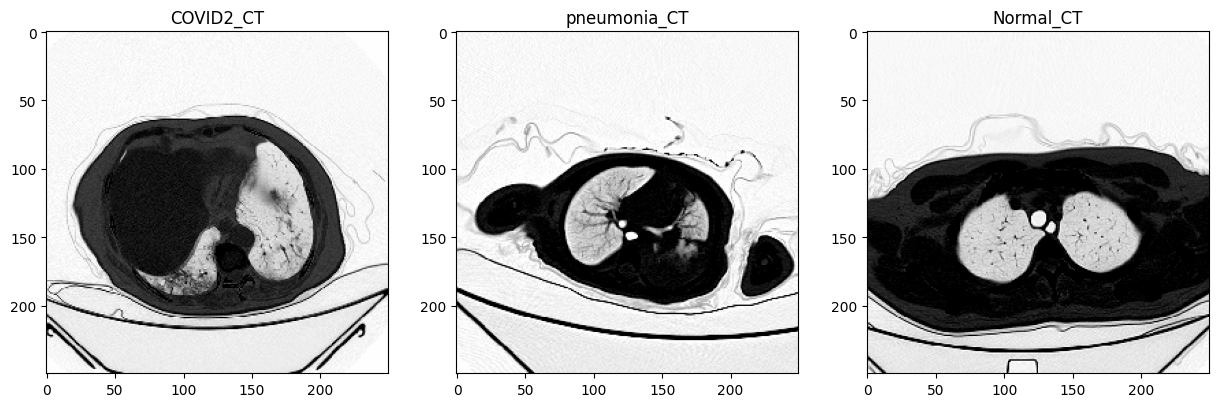

In [9]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            resized_img = resize_image(img, new_width, new_height)
            inverted_img = invert_image(resized_img) 
            
            # Menampilkan gambar
            update[i].imshow(inverted_img, cmap='gray')
            update[i].set_title(label)

plt.show()

## Melakukan penyesuaian kontras

In [10]:
def adjust_contrast(image, factor):
    # Mengambil nilai minimum dan maksimum dari citra
    min_value = np.min(image)
    max_value = np.max(image)

    # Menyesuaikan kontras dengan faktor yang diberikan
    adjusted_image = ((image - min_value) * (factor / (max_value - min_value))).astype(np.uint8)

    return adjusted_image

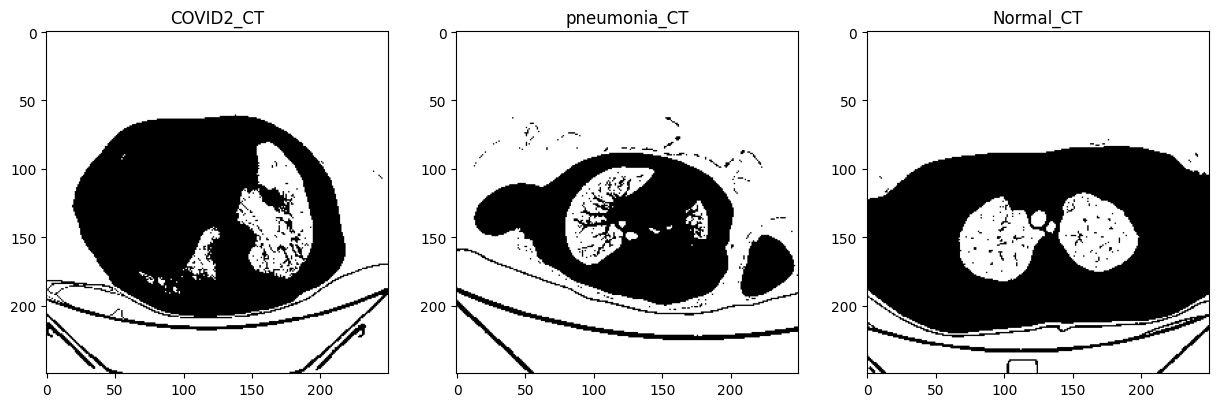

In [11]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            resized_img = resize_image(img, new_width, new_height)
            inverted_img = invert_image(resized_img)
            adjust_img= adjust_contrast(inverted_img, factor=1.5) #mengatur factor berdasarkan kebutuhan factor yang paling stabil dari (1-2)
            
            # Menampilkan gambar
            update[i].imshow(adjust_img, cmap='gray')
            update[i].set_title(label)

plt.show()

## Melakukan Ekaluasi

In [12]:
def equalize_image(img):
    hist = np.zeros(256)

    #inisialisasi variabel tinggi dan lebar dengan mengambil ukuran gray_img
    tinggi=img.shape[0]
    lebar=img.shape[1]

    #looping yang digunakan untuk mendapat jumlah array dari variabel img dan disimpan pada hist
    for i in range(tinggi):
        for j in range(lebar):
            hist[img[i,j]] += 1

    #hitung kumulatif distribusi histogram
    #inisialisasi variabel cdf berukuran array 256
    cdf = np.zeros(256)

    #insialisasi sum_hist untuk menampung nilai jumlah array dari variabel hist
    sum_hist = np.sum(hist)

    #looping untuk mendapat nilai distribusi kumulatif tiap piksel dan disimpan dalam cdf
    for i in range(256):

        cdf[i] = np.sum(hist[:i+1]) / sum_hist

    # Lakukan proses ekualisasi histogram
    #inisialisasi variabel equ berukuran variabel img untuk menampung hasil ekualisasi
    equ = np.zeros_like(img)

    #looping untuk menampung hasil ekualisasi tiap piksel
    for i in range(tinggi):
        for j in range(lebar):
            
            #nilai ekualisasi ditampung pada equ yakni nilai distribusi kumulatif dikali banyak piksel dan dibulatkan
            equ[i,j] = np.round(cdf[img[i,j]] * 256)
    return equ

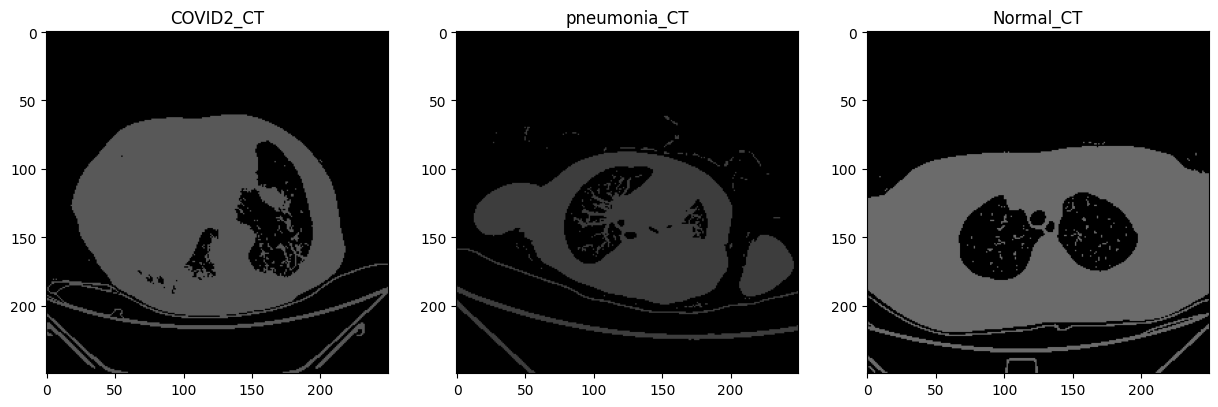

In [13]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            
            resized_img = cv2.resize(img, (new_width, new_height))
            inverted_img = invert_image(resized_img)
            adjust_img = adjust_contrast(inverted_img, factor=1.5)
            equalized_img = equalize_image(adjust_img)
            
            # Menampilkan gambar
            update[i].imshow(equalized_img, cmap='gray')
            update[i].set_title(label)

plt.show()


## Melakukan Reduksi Noise (median filtering)

In [14]:
def median_filter(image, kernel_size):

    # Mendapatkan ukuran citra
    height, width = image.shape[:2]

    # Membuat matriks kosong untuk citra hasil filtering
    filtered_image = np.zeros((height, width), dtype=np.uint8)

    # Mendapatkan setengah ukuran kernel
    k = kernel_size // 2

    # Looping untuk melakukan median filtering pada setiap piksel
    for i in range(k, height-k):
        for j in range(k, width-k):

            # Membuat kernel untuk piksel saat ini
            kernel = image[i-k:i+k+1, j-k:j+k+1]

            # Mengurutkan nilai piksel dalam kernel secara manual dengan nested loop
            pengurutan_pixels = kernel.flatten()

            #perulangan yang digunakan dalam mengakses pasangan pixel yang ada agar dapat ditukar
            for m in range(len(pengurutan_pixels)-1):
                for n in range(m+1, len(pengurutan_pixels)):

                    #percabangan yang digunakan sebagai operator dalam menukar antar value pixel agar dapat ter-urut
                    if pengurutan_pixels[m] > pengurutan_pixels[n]:
                        temp = pengurutan_pixels[m]
                        pengurutan_pixels[m] = pengurutan_pixels[n]
                        pengurutan_pixels[n] = temp

            # Mencari nilai median dalam kernel
            median_new = pengurutan_pixels[len(pengurutan_pixels) // 2]
            
            # Memasukkan nilai median ke dalam matriks hasil filtering
            filtered_image[i,j] = median_new
    return filtered_image

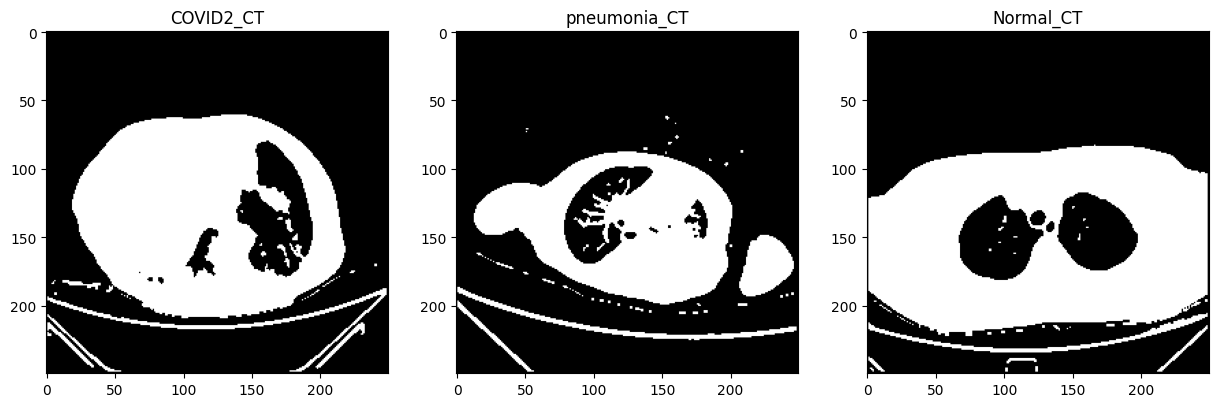

In [15]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            
            resized_img = cv2.resize(img, (new_width, new_height))
            inverted_img = invert_image(resized_img)
            adjust_img = adjust_contrast(inverted_img, factor=1.5)
            equalized_img = equalize_image(adjust_img)
            modus_img = median_filter(equalized_img, kernel_size=3)
            
            # Menampilkan gambar
            update[i].imshow(modus_img, cmap='gray')
            update[i].set_title(label)

plt.show()

## Inverse Ke-2

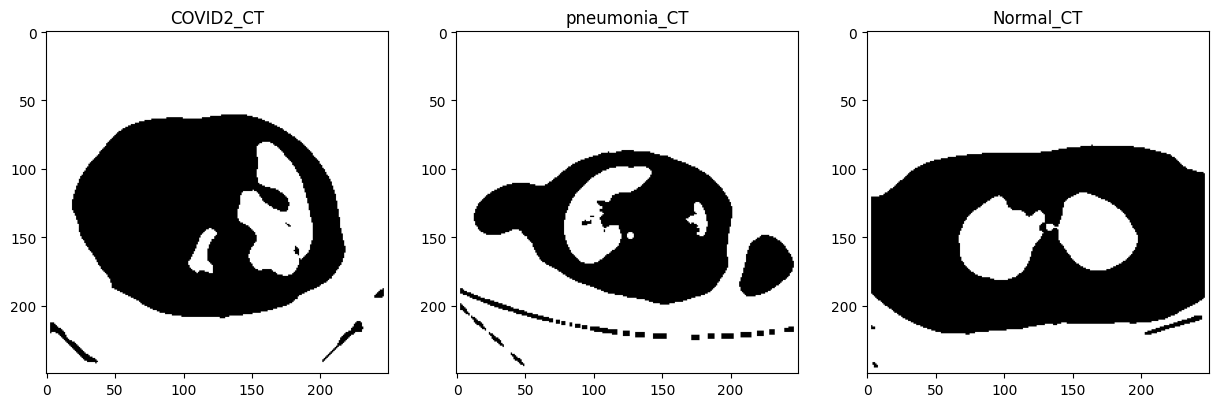

In [16]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            
            resized_img = cv2.resize(img, (new_width, new_height))
            inverted_img = invert_image(resized_img)
            adjust_img = adjust_contrast(inverted_img, factor=1.5)
            equalized_img = equalize_image(adjust_img)
            modus_img = median_filter(equalized_img, kernel_size=7)
            inverted_img2 = invert_image(modus_img)
            
            # Menampilkan gambar
            update[i].imshow(inverted_img2, cmap='gray')
            update[i].set_title(label)

plt.show()

In [17]:
# Filter Sobel untuk mendeteksi tepi horizontal (sumbu X)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Filter Sobel untuk mendeteksi tepi vertikal (sumbu Y)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

## Pendekteksian Tepi 

In [18]:
#fungsi untuk melakukan thresholding
def thresholding(citra):
    #nilai ambang batas ditentukan yakni 128
    threshold_value= 1
    #definisikan variabel hasil untuk menampung hasil thresholding
    hasil = np.zeros(citra.shape, dtype=np.uint8)
    #apabila nilai piksel lebih dari ambang batas, maka nilai menjadi 255
    hasil[np.where(citra >= threshold_value)] = 255
    #return variabel hasil
    return hasil

In [19]:

def convolve2D(image, kernel): # membuat sebuah function convolde2D dengan parameter image dan kernel
    height = image.shape[0] # membuat variabel untuk tinggi image 
    width = image.shape[1] #membuat variabel untuk lebar image

    output = np.zeros_like(image).astype(int) #membuat variabel baru dimana berisi semua elemen image bernilai 0

    for i in range(height): #perulangan untuk mengakses setiap tinggi image
        for j in range(width): #perulangan untuk mengakses setiap lebar image
            result= 0 # menginisialisasi nilai variabel menjadi 0
            for k in range(len(kernel)): #Memulai loop for ketiga untuk variabel k dengan rentang dari 0 hingga panjang kernel (jumlah baris dalam matriks kernel) dikurangi 1.
                 for l in range(len(kernel)): #Mengecek apakah nilai i+2 lebih besar atau sama dengan height atau nilai j+2 lebih besar atau sama dengan width
                    if (i+2>=height)or (j+2>=width): # Mengecek apakah nilai i+2 lebih besar atau sama dengan height atau nilai j+2 lebih besar atau sama dengan width. Jika ya, maka dilakukan continue untuk melanjutkan ke iterasi selanjutnya dalam loop.
                         continue
                    else:
                        result+= image[i+k][j+l]*kernel[k][l] #ika kondisi pada langkah sebelumnya tidak terpenuhi, maka hasil konvolusi antara piksel pada posisi (i+k, j+l) dalam array image dengan elemen kernel pada posisi (k, l) ditambahkan ke variabel result.
                        output[i,j]=result #Hasil konvolusi yang disimpan dalam variabel result diassign ke posisi (i, j) dalam array output.
    #Mengembalikan array output setelah proses konvolusi selesai.
    return output

def deteksi_tepi(gray,kernel_x, kernel_y):# fungsi dengan nama deteksi_tepi yang memiliki tiga parameter:
        convolve_x = convolve2D(gray, kernel_x) #fungsi convolve2D untuk melakukan operasi konvolusi antara gambar gray dan matriks kernel kernel_x. Hasil konvolusi disimpan dalam variabel convolve_x
        convolve_y = convolve2D(gray, kernel_y) # fungsi convolve2D untuk melakukan operasi konvolusi antara gambar gray dan matriks kernel kernel_y. Hasil konvolusi disimpan dalam variabel convolve_y
        
        thres_x = thresholding(convolve_x) # fungsi thresholding untuk melakukan thresholding pada hasil konvolusi convolve_x. Hasil thresholding disimpan dalam variabel thres_x.
        thres_y = thresholding(convolve_y) #  fungsi thresholding untuk melakukan thresholding pada hasil konvolusi convolve_y. Hasil thresholding disimpan dalam variabel thres_y.
        
        magnitude = np.sqrt(thres_x**2 + thres_y**2) #Menghitung magnitudo gradien dengan menghitung akar kuadrat dari jumlah kuadrat thres_x dan thres_y. Hasilnya disimpan dalam variabel magnitude.
        return magnitude

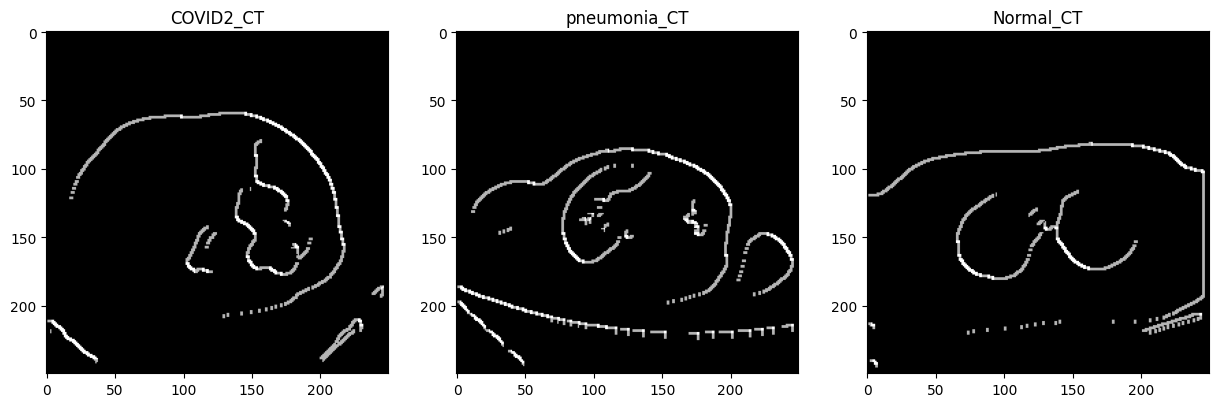

In [20]:
# Memproses gambar pada folder
fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder_path)), figsize=(15, 7))

for i, label in enumerate(os.listdir(folder_path)):
    label_path = os.path.join(folder_path, label)

    if os.path.isdir(label_path):
        for j, filename in enumerate(os.listdir(label_path)):
            if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                break  # Hanya mengambil satu gambar per folder
            file_path = os.path.join(label_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            
            resized_img = cv2.resize(img, (new_width, new_height))
            inverted_img = invert_image(resized_img)
            adjust_img = adjust_contrast(inverted_img, factor=1.5)
            equalized_img = equalize_image(adjust_img)
            modus_img = median_filter(equalized_img, kernel_size=7)
            inverted_img2 = invert_image(modus_img)
            sobel_img = deteksi_tepi(inverted_img2, sobel_x, sobel_y)
            
            # Menampilkan gambar
            update[i].imshow(sobel_img, cmap='gray')
            update[i].set_title(label)

plt.show()